In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c8d8e740bada5bd06356dea0608ce6a4547939ef0ab4953001328d2ade39d061
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


x_train shape: (60000, 28, 28) y_train shape: (60000,)


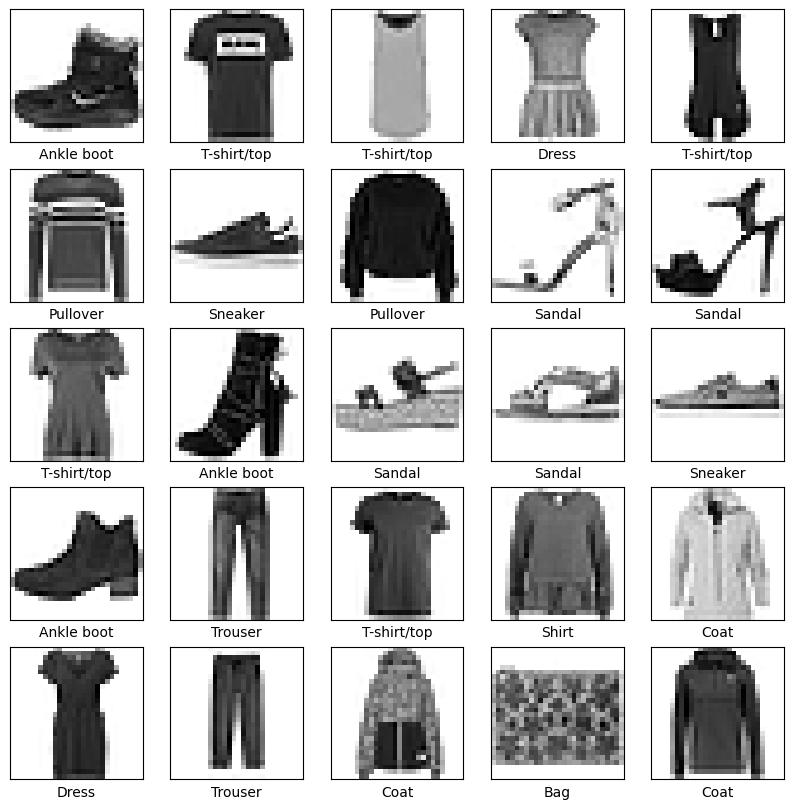

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import keras
from keras import layers
from keras.utils import to_categorical
from random import randint


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_test_flat = y_test.reshape(y_test.shape[0], -1)

x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


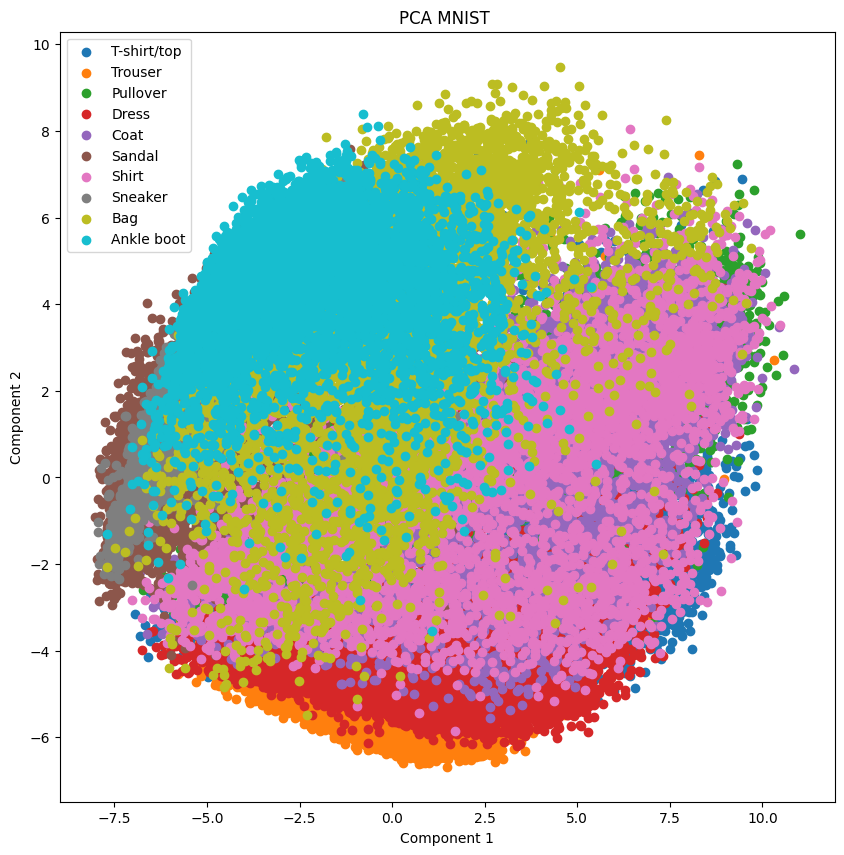

Epoch 1/3
1875/1875 [==============================] - 65s 34ms/step - loss: 0.6363 - accuracy: 0.7663 - val_loss: 0.4933 - val_accuracy: 0.8143
Epoch 2/3
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4285 - accuracy: 0.8428 - val_loss: 0.4329 - val_accuracy: 0.8391
Epoch 3/3
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3735 - accuracy: 0.8629 - val_loss: 0.4070 - val_accuracy: 0.8515


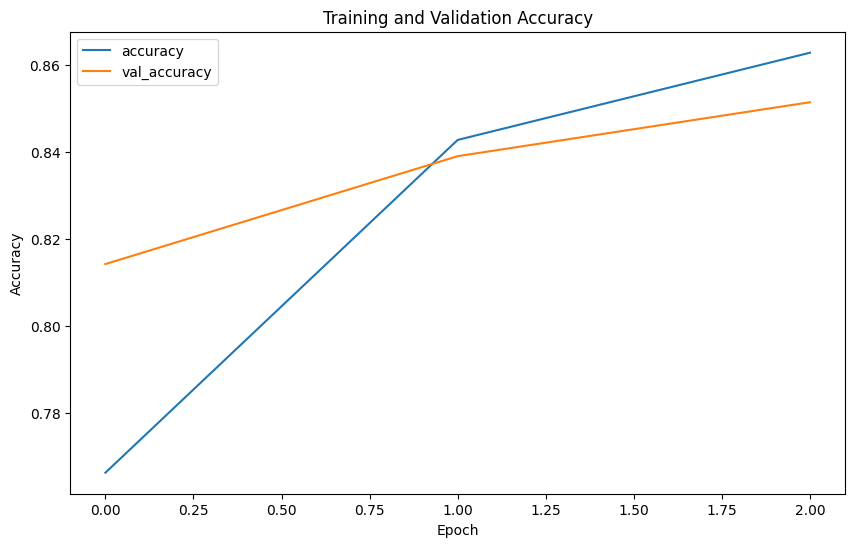

313/313 [==============================] - 3s 9ms/step - loss: 0.4070 - accuracy: 0.8515
Test Loss: 0.4070453941822052
Test Accuracy: 0.8514999747276306


In [36]:

class PCA_and_CNN:
  def __init__(self):
    pca_model = PCA(n_components=min(x_train_flat.shape[0], x_train_flat.shape[1]))

    x_train_pca_data = pca_model.fit_transform(x_train_flat)
    x_test_pca = pca_model.transform(x_test_flat)

    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.scatter(x_train_pca_data[y_train == i, 0], x_train_pca_data[y_train == i, 1], label=class_names[i])
    plt.title('PCA MNIST ')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()
    self.x_train_cnn = x_train_pca_data.reshape((-1, 28, 28, 1))
    self.x_test_cnn = x_test_pca.reshape((-1, 28, 28, 1))


  def CNN(self):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(self.x_train_cnn, y_train, epochs=3, validation_data=(self.x_test_cnn, y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    test_loss, test_accuracy = model.evaluate(self.x_test_cnn, y_test)

    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

pca_and_cnn = PCA_and_CNN()
pca_and_cnn.CNN()

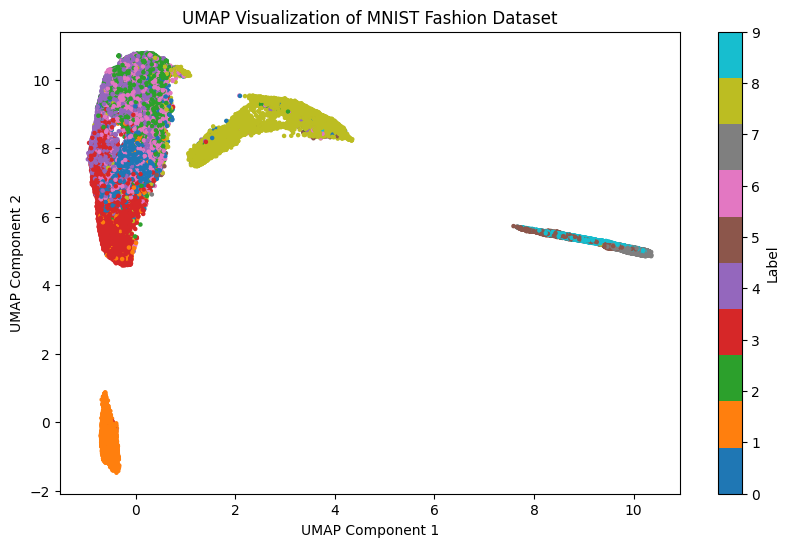

1875/1875 [==============================] - 96s 50ms/step - loss: 0.7166 - accuracy: 0.7198 - val_loss: 2.8094 - val_accuracy: 0.2992


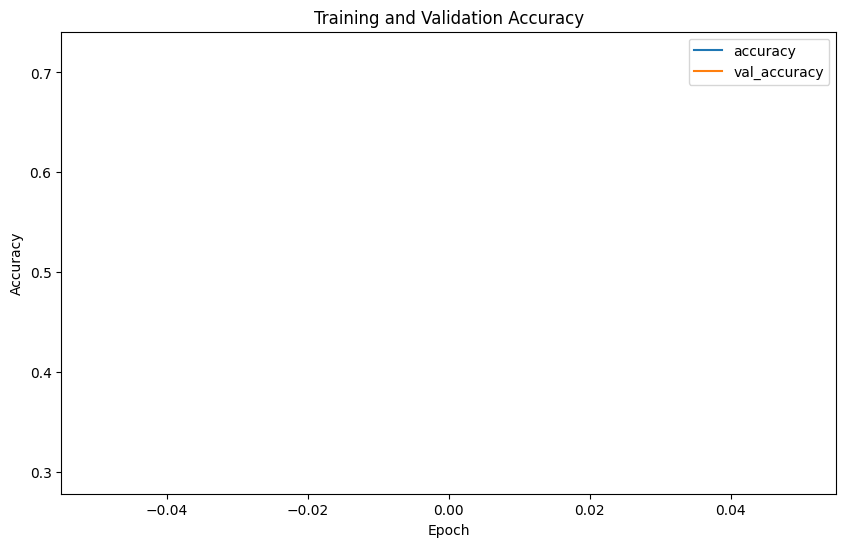

313/313 [==============================] - 5s 16ms/step - loss: 2.8094 - accuracy: 0.2992
Test Loss: 2.8094255924224854
Test Accuracy: 0.29919999837875366


In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from umap import UMAP

class UMAP_and_CNN:
  def __init__(self):
    umap = UMAP(n_components=50)
    umap_results = umap.fit_transform(x_train_flat)
    umap_test = umap.fit_transform(x_test_flat)
    plt.figure(figsize=(10, 6))
    plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_train_flat, cmap='tab10', s=5)
    plt.title('UMAP Visualization of MNIST Fashion Dataset')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(label='Label')
    plt.show()
    self.x_train_cnn = umap_results.reshape((-1, 10, 5, 1))
    self.x_test_cnn = umap_test.reshape((-1, 10, 5, 1))


  def CNN(self):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(10, 5, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((1, 1), padding='valid', strides=(1, 1)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((1, 1), padding='valid', strides=(1, 1)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((1, 1), padding='valid', strides=(1, 1)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(self.x_train_cnn, y_train, epochs=1, validation_data=(self.x_test_cnn, y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    test_loss, test_accuracy = model.evaluate(self.x_test_cnn, y_test)

    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
umap_and_cnn = UMAP_and_CNN()
umap_and_cnn.CNN()

x_train shape: (60000, 28, 28) y_train shape: (60000,)


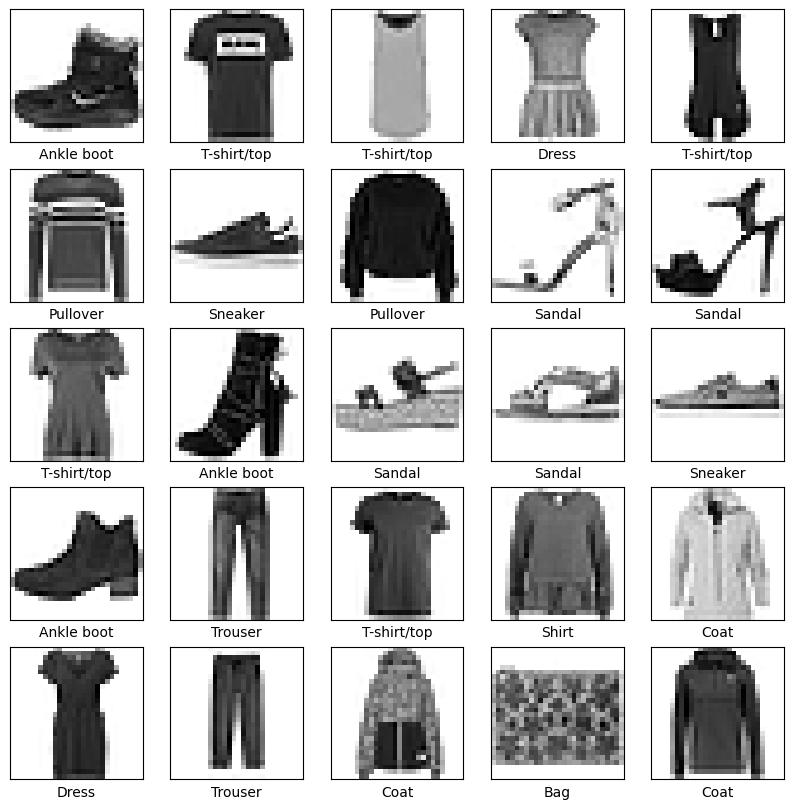

(60000, 2)


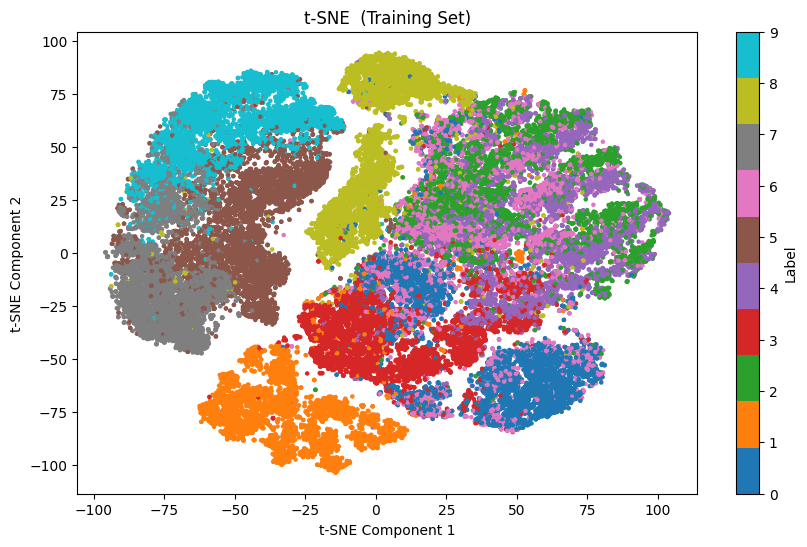

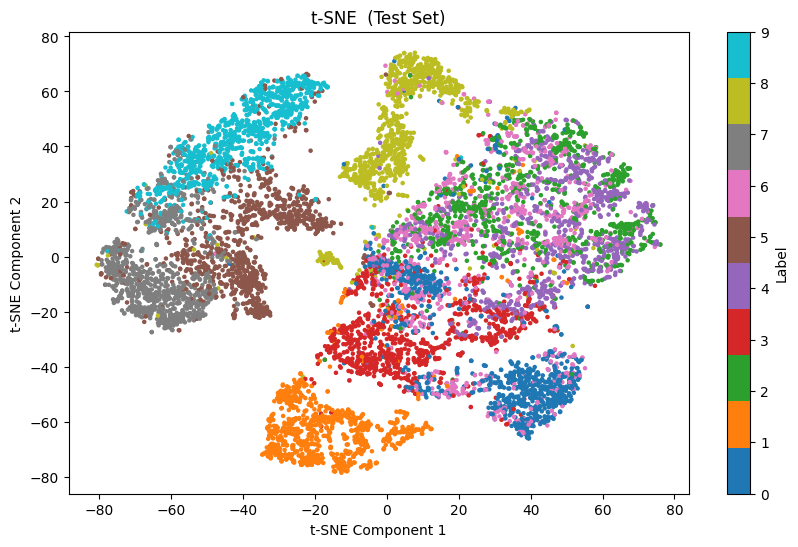

UnboundLocalError: local variable 'y_train' referenced before assignment

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_test_flat = y_test.reshape(y_test.shape[0], -1)

x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

tsne = TSNE(n_components=2)

tsne_results_train = tsne.fit_transform(x_train_flat)
tsne_results_test = tsne.fit_transform(x_test_flat)
print(tsne_results_train.shape)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results_train[:, 0], tsne_results_train[:, 1], c=y_train, cmap='tab10', s=5)
plt.title('t-SNE  (Training Set)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Label')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results_test[:, 0], tsne_results_test[:, 1], c=y_test, cmap='tab10', s=5)
plt.title('t-SNE  (Test Set)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Label')
plt.show()

self.x_train = x_train_flat.reshape((-1, 28, 28, 1))
self.x_test = x_test_flat.reshape((-1, 28, 28, 1))




assert len(self.x_train) == len(y_train), "Number of samples and labels should match"

num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)
